In [1]:
import pandas as pd
import numpy as np

In [2]:
#begin by importing all of the necessary datasets: sugar/water/bitter neurons
# importing all of the connections and the second order neurons filtering for
#variables of choice

In [4]:
neurons = pd.read_csv('/Users/SydneyWalker/Downloads/neurons.csv.gz')
connections = pd.read_csv('/Users/SydneyWalker/Downloads/connections.csv.gz')
sugar_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_neurons.csv').query("side == 'left'")
bitter_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_neurons.csv').query("side == 'left'")
water_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/water_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]
lowsalt_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]

In [5]:
sugar_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
bitter_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
water_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/water_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]

In [6]:
sugar_downstream[0:3]

,root_id,label,input_synapses
4,720575940611149922,[],2884
5,720575940611875570,['Sugar Gustatory Receptor Neuron (GRN); See E...,153
6,720575940612064113,[],249


In [7]:
result = connections.groupby(['pre_root_id', 'post_root_id','neuropil'])['syn_count'].sum().reset_index()

sugar_merge = pd.merge(result, sugar_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
sugar_merge = sugar_merge.drop(columns='root_id')

sugar_merge2 = pd.merge(sugar_merge, sugar_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
sugar_connections = sugar_merge2.groupby('post_root_id')['syn_count'].sum().reset_index()
sugar_labels = pd.merge(sugar_connections, sugar_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
sugar_labels = sugar_labels.drop(columns = 'root_id')

sugar_labels.rename(columns={'input_synapses': 'total # input synapses','syn_count':'# input sugar synapses','post_root_id':'second order cell ID'}, inplace=True)
sugar_labels['% input from sugar GRNs'] = sugar_labels['# input sugar synapses'] / sugar_labels['total # input synapses'] * 100
sugar_labels = sugar_labels.sort_values(by = '% input from sugar GRNs', ascending = False)

In [8]:
water_merge = pd.merge(result, water_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
water_merge = water_merge.drop(columns='root_id')

water_merge2 = pd.merge(water_merge, water_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
water_connections = water_merge2.groupby('post_root_id')['syn_count'].sum().reset_index()

water_labels = pd.merge(water_connections, water_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
water_labels = water_labels.drop(columns = 'root_id')

water_labels.rename(columns={'input_synapses': 'total # input synapses','syn_count':'# input water synapses','post_root_id':'second order cell ID'}, inplace=True)
water_labels['% input from water GRNs'] = water_labels['# input water synapses'] / water_labels['total # input synapses'] * 100
water_labels = water_labels.sort_values(by = '% input from water GRNs', ascending = False)



In [9]:
bitter_merge = pd.merge(result, bitter_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
bitter_merge = bitter_merge.drop(columns='root_id')

bitter_merge2 = pd.merge(bitter_merge, bitter_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
bitter_connections = bitter_merge2.groupby('post_root_id')['syn_count'].sum().reset_index()

bitter_labels = pd.merge(bitter_connections, bitter_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
bitter_labels = bitter_labels.drop(columns = 'root_id')

bitter_labels.rename(columns={'input_synapses': 'total # input synapses','syn_count':'# input bitter synapses','post_root_id':'second order cell ID'}, inplace=True)
bitter_labels['% input from bitter GRNs'] = bitter_labels['# input bitter synapses'] / bitter_labels['total # input synapses'] * 100
bitter_labels = bitter_labels.sort_values(by = '% input from bitter GRNs', ascending = False)



In [95]:
SugarWater = pd.merge(sugar_labels[['second order cell ID', 'label','# input sugar synapses', '% input from sugar GRNs']], water_labels[['second order cell ID', '# input water synapses','% input from water GRNs','total # input synapses']], on= 'second order cell ID', how = 'inner')
SugarWater

,second order cell ID,label,# input sugar synapses,% input from sugar GRNs,# input water synapses,% input from water GRNs,total # input synapses
0,720575940629888530,['Second-order gustatory neuron Zorro (Shiu; S...,491,35.298347,250,17.972682,1391
1,720575940620874757,['G2N-1; Second-order taste neuron'],321,32.326284,49,4.934542,993
2,720575940627383685,['Second-order gustatory neuron Billiards (Shi...,320,30.389364,17,1.614435,1053
3,720575940616885538,['labial GRN'; 'Sugar Gustatory Receptor Neuro...,54,28.571429,9,4.761905,189
4,720575940626191306,['Second-order gustatory neuron Fuchs (Shiu; S...,268,25.818882,28,2.697495,1038
5,720575940632648612,['Second-order gustatory neuron Usnea (Sterne ...,162,23.684211,151,22.076023,684
6,720575940612670570,['Possible Sugar Gustatory Receptor Neuron (GR...,37,20.441989,5,2.762431,181
7,720575940616103218,['Phantom; Second-order taste neuron'],121,20.133111,272,45.257903,601
8,720575940619588568,['unclassified_IN_FW_598'],46,19.008264,52,21.487603,242
9,720575940655014049,['ascending_FW_251'; 'Clavicle; Second-order t...,254,18.717760,206,15.180545,1357


In [ ]:
SugarBitter = pd.merge(sugar_labels[['second order cell ID', 'label','# input sugar synapses', '% input from sugar GRNs']], bitter_labels[['second order cell ID', '# input bitter synapses','% input from bitter GRNs','total # input synapses']], on= 'second order cell ID', how = 'inner')
SugarBitter

In [ ]:
WaterBitter = pd.merge(water_labels[['second order cell ID', 'label','# input water synapses', '% input from water GRNs']], bitter_labels[['second order cell ID', '# input bitter synapses','% input from bitter GRNs','total # input synapses']], on= 'second order cell ID', how = 'inner')
WaterBitter

In [81]:
diff = []
for entry in SugarWater['second order cell ID'].unique():
    diff.append(max(float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from sugar GRNs']),float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from water GRNs']))/min(float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from sugar GRNs']),float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from water GRNs']))) 
        #print(max(float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from sugar GRNs']),float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from water GRNs'])),min(float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from sugar GRNs']),float(SugarWater[SugarWater['second order cell ID'] == entry]['% input from water GRNs'])))

In [91]:
for entry in SugarBitter['second order cell ID'].unique():
    diff.append(max(float(SugarBitter[SugarBitter['second order cell ID'] == entry]['% input from sugar GRNs']),float(SugarBitter[SugarBitter['second order cell ID'] == entry]['% input from bitter GRNs']))/min(float(SugarBitter[SugarBitter['second order cell ID'] == entry]['% input from sugar GRNs']),float(SugarBitter[SugarBitter['second order cell ID'] == entry]['% input from bitter GRNs']))) 

In [93]:
for entry in WaterBitter['second order cell ID'].unique():
    diff.append(max(float(WaterBitter[WaterBitter['second order cell ID'] == entry]['% input from water GRNs']),float(WaterBitter[WaterBitter['second order cell ID'] == entry]['% input from bitter GRNs']))/min(float(WaterBitter[WaterBitter['second order cell ID'] == entry]['% input from water GRNs']),float(WaterBitter[WaterBitter['second order cell ID'] == entry]['% input from bitter GRNs']))) 

In [97]:
from scipy.stats import ttest_1samp
ttest_1samp(diff, 1)


# print(f"T-statistic: {t_statistic}")
# print(f"P-value: {p_value}")


TtestResult(statistic=4.848849502394393, pvalue=2.6948776169691748e-05, df=34)

In [84]:
np.mean(diff)

6.033549255781565

In [47]:
min(float(SugarWater[0:1]['% input from sugar GRNs']),float(SugarWater[0:1]['% input from water GRNs']))

17.97268152408339

In [13]:
sugar_upstream = sugar_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
sugar_upstream.columns = ['second order cell ID', '# upstream sugar cells']

In [14]:
cells_upstream = connections.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
cells_upstream.columns = ['second order cell ID', '# upstream cells']

In [15]:
def projection(neuropil):
    if neuropil == 'GNG':
        return 'local'
    else:
        return 'outside SEZ'

In [16]:
sugar_labels2 = pd.merge(sugar_labels, sugar_upstream, on = 'second order cell ID')
sugar_labels2 = pd.merge(sugar_labels2, cells_upstream, on = 'second order cell ID', how = 'inner')
sugar_labels2[0:3]

,second order cell ID,# input sugar synapses,label,total # input synapses,% input from sugar GRNs,# upstream sugar cells,# upstream cells
0,720575940642361485,10,[],10,100.000000,1,1
1,720575940637568838,48,['Sugar Gustatory Receptor Neuron (GRN); See E...,107,44.859813,3,6
2,720575940629888530,491,['Second-order gustatory neuron Zorro (Shiu; S...,1391,35.298347,18,74


In [17]:
sugar_merge2['projection'] = sugar_merge2['neuropil'].apply(projection)
sugar_merge2[0:3]

,pre_root_id,post_root_id,neuropil,syn_count,root_id,label,input_synapses,projection
0,720575940610788069,720575940612479205,GNG,8,720575940612479205,[],842,local
1,720575940610788069,720575940616103218,GNG,6,720575940616103218,['Phantom; Second-order taste neuron'],601,local
2,720575940611875570,720575940616103218,GNG,10,720575940616103218,['Phantom; Second-order taste neuron'],601,local


In [18]:
bitter_upstream = bitter_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
bitter_upstream.columns = ['second order cell ID', '# upstream bitter cells']

In [19]:
bitter_labels2 = pd.merge(bitter_labels, bitter_upstream, on = 'second order cell ID')
bitter_labels2 = pd.merge(bitter_labels2, cells_upstream, on = 'second order cell ID', how = 'inner')
bitter_labels2[0:3]

,second order cell ID,# input bitter synapses,label,total # input synapses,% input from bitter GRNs,# upstream bitter cells,# upstream cells
0,720575940638557312,122,['Mime; Putative second-order bitter neuron; S...,499,24.448898,8,32
1,720575940626287336,11,['labellar bitter gustatory receptor neuron (G...,47,23.404255,2,6
2,720575940624273149,46,['Mime; Putative second-order bitter neuron; S...,316,14.556962,5,34


In [20]:
bitter_merge2['projection'] = bitter_merge2['neuropil'].apply(projection)
bitter_merge2[0:3]

,pre_root_id,post_root_id,neuropil,syn_count,root_id,label,input_synapses,projection
0,720575940602353632,720575940610956334,GNG,6,720575940610956334,['Turner; See Sterne et al.; 2021; https://doi...,643,local
1,720575940610481370,720575940610956334,GNG,5,720575940610956334,['Turner; See Sterne et al.; 2021; https://doi...,643,local
2,720575940602353632,720575940614139089,GNG,6,720575940614139089,[],274,local


In [21]:
water_upstream = water_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
water_upstream.columns = ['second order cell ID', '# upstream water cells']

In [22]:
water_labels2 = pd.merge(water_labels, water_upstream, on = 'second order cell ID')
water_labels2 = pd.merge(water_labels2, cells_upstream, on = 'second order cell ID', how = 'inner')
water_labels2[0:3]

,second order cell ID,# input water synapses,label,total # input synapses,% input from water GRNs,# upstream water cells,# upstream cells
0,720575940622486922,43,['labial GRN'; 'gustatory receptor neuron/GRN?'],74,58.108108,3,7
1,720575940627821896,6,[],11,54.545455,1,2
2,720575940612579053,23,['gustatory receptor neuron/GRN?'],47,48.936170,3,5


In [23]:
water_merge2['projection'] = water_merge2['neuropil'].apply(projection)
water_merge2[0:3]

,pre_root_id,post_root_id,neuropil,syn_count,root_id,label,input_synapses,projection
0,720575940606002609,720575940612648106,GNG,10,720575940612648106,['Fudog (Sterne et al.; 10.7554/eLife.71679; S...,347,local
1,720575940612579053,720575940612648106,GNG,12,720575940612648106,['Fudog (Sterne et al.; 10.7554/eLife.71679; S...,347,local
2,720575940612950568,720575940612648106,GNG,8,720575940612648106,['Fudog (Sterne et al.; 10.7554/eLife.71679; S...,347,local


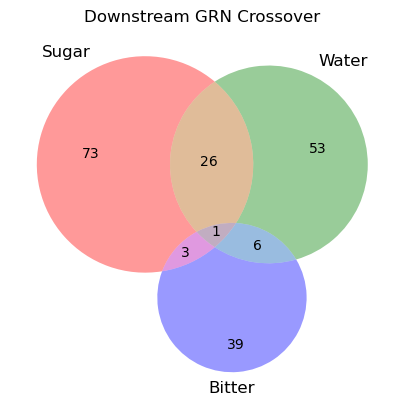

In [24]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Sample data
sugar = set(sugar_labels['second order cell ID'])
water = set(water_labels['second order cell ID'])
bitter = set(bitter_labels['second order cell ID'])

# Calculate circle sizes and overlaps
size_sugar = len(sugar)
size_water = len(water)
size_bitter = len(bitter)
overlap_sugarwater = len(sugar.intersection(water))
overlap_sugarbitter = len(sugar.intersection(bitter))
overlap_waterbitter = len(water.intersection(bitter))
overlap_sugarwaterbitter = len(sugar.intersection(water).intersection(bitter))

# Create Venn diagram
venn = venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_bitter, overlap_sugarbitter, overlap_waterbitter, overlap_sugarwaterbitter),
             set_labels=('Sugar', 'Water', 'Bitter'))

# Display the plot
plt.title("Downstream GRN Crossover")
plt.show()


In [25]:
import navis
# from fafbseg import flywire

In [ ]:
navis.example_neurons

<function navis.data.load_data.example_neurons(n: Optional[int] = None, kind: Union[Literal['mesh'], Literal['skeleton'], Literal['mix']] = 'skeleton', synapses: bool = True, source: Union[Literal['swc'], Literal['gml']] = 'swc') -> Union[navis.core.skeleton.TreeNeuron, navis.core.mesh.MeshNeuron, navis.core.neuronlist.NeuronList]>

In [ ]:
for i in range(len(sugar_downstream)):
    navis.NeuronList.append(i)

TypeError: append() missing 1 required positional argument: 'v'

In [ ]:
n = navis.example_neurons(n=1, kind='skeleton')
n

,
type,navis.TreeNeuron
name,DA1_lPN_R
id,1734350788
n_nodes,4465
n_connectors,2705
n_branches,599
n_leafs,618
cable_length,266476.875
soma,[4177]
units,8 nanometer


In [ ]:
nl = navis.example_neurons(n=5, kind='skeleton')
nl

In [ ]:
for id in 

In [ ]:
fig = nl.plot3d()

In [ ]:
n.nodes.head()

In [ ]:
# n

In [ ]:
# n = flywire.get_mesh_neuron(720575940625431866)
# n
# sk = flywire.skeletonize_neuron(720575940625431866, progress=False)
# sk
# navis.plot3d([sk, n], color=["r", (0, 0, 0, 0.1)])

In [ ]:
# n = flywire.get_mesg_neuron(list(sugar_labels['second order cell ID']))
# sk = flywire.skeletonize_neuron(list(sugar_labels['second order cell ID']), progress=False)
# navis.plot3d([sk, n], color=["r", (0, 0, 0, 0.1)])